In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

import numpy as np
import pandas as pd
import glob

from collections import defaultdict

from data.real_world_datasets import Datasets as RealWorldDatasets

In [25]:

PATH, Datasets, CAPTION = "results/real_world_standardized/", RealWorldDatasets, "Evaluating on real-world datasets."
PATH, Datasets, = "results/real_world/", RealWorldDatasets, 

In [27]:
df = pd.concat([pd.read_csv(path) for path in glob.glob(f"{PATH}*/*")])

def convert_dict(df, data_dict, col, agg):
    for ((dataset, eval_method), value) in getattr(df.groupby(["dataset", "measure"])[col], agg)().to_dict().items():
        data_dict[(dataset, agg)][(eval_method, col)] = value

data_dict = defaultdict(dict)
for col, agg in [(col, agg) for col in ["value", "time", "process_time"] for agg in ["mean", "std"]]:
    convert_dict(df, data_dict, col, agg)

df_data = pd.DataFrame.from_dict(data_dict, orient="index")

In [28]:
datanames = []
for dataset in Datasets:
    datanames.append((dataset.name, "mean"))
    datanames.append((dataset.name, "std"))

METRICS = [
    "DISCO",
    "DC_DUNN",
    ### Competitors
    "DBCV",
    "DCSI",
    "S_DBW",
    "CDBW",
    "CVDD",
    "CVNN",
    "DSI",
    ### Gauss
    "SILHOUETTE",
    "DUNN",
    "DB",
    "CH",
]

df2 = df_data
df2 = df2.reindex(datanames)
df2 = df2.reindex(columns=df2.columns.reindex(METRICS, level=0)[0])
df2 = df2.reindex(columns=df2.columns.reindex(["value"], level=1)[0])
df2 = df2.round(3)
# df2

DISCO DC_DUNN   DBCV   DCSI  S_DBW   CDBW  CVDD        CVNN  \
                 value   value  value  value  value  value value       value   
Synth_low  mean  0.762   1.692  0.040  0.972  0.092  0.487   0.0       1.038   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Synth_high mean  0.811   1.867  0.037  0.959  0.309  9.357   0.0       1.743   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
HAR        mean -0.014   0.233 -0.063  0.493  0.602  0.000   0.0      40.721   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
letterrec. mean -0.020   0.200 -0.020  0.199  0.819  0.000   0.0     264.632   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
htru2      mean  0.335   0.027 -0.868  0.001  0.827  0.000   0.0     210.640   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Mice       mean -0.023   0.124 -0.082  0.213  0.902  0.000   0.0      20.587   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Pendigits  mean  0.126   0.167 -0.060  0.369  0.656  0.000   0.0    1075.341   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Weizmann   mean  0.152   0.220 -0.004  0.705  0.554    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Keck       mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
COIL20     mean  0.296   0.432  0.025  0.740  0.629  0.000   0.0  152444.853   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
COIL100    mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
cmu_faces  mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
Optdigits  mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
USPS       mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
MNIST      mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
FMNIST     mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
KMNIST     mean    NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   
           std     NaN     NaN    NaN    NaN    NaN    NaN   NaN         NaN   

                   DSI SILHOUETTE   DUNN     DB         CH  
                 value      value  value  value      value  
Synth_low  mean  0.978      0.614  1.001  0.608  47742.142  
           std     NaN        NaN    NaN    NaN        NaN  
Synth_high mean  0.814      0.498  0.467  0.831   3698.814  
           std     NaN        NaN    NaN    NaN        NaN  
HAR        mean  0.593      0.062  0.079  3.561   3662.527  
           std     NaN        NaN    NaN    NaN        NaN  
letterrec. mean  0.298      0.009  0.083  4.351    382.571  
           std     NaN        NaN    NaN    NaN        NaN  
htru2      mean  0.367      0.262  0.117  1.132   1962.939  
           std     NaN        NaN    NaN    NaN        NaN  
Mice       mean  0.252     -0.011  0.099  4.364     51.823  
           std     NaN        NaN    NaN    NaN        NaN  
Pendigits  mean  0.608      0.181  0.200  2.321   1404.466  
           std     NaN        NaN    NaN    NaN        NaN  
Weizmann   mean    NaN        NaN    NaN    NaN        NaN  
           std     NaN        NaN    NaN    NaN        NaN  
Keck       mean    NaN        NaN    N

In [66]:
from clustpy.utils import evaluation_df_to_latex_table

# evaluation_df_to_latex_table(df2, "summary.tex", color_by_value="Green")
evaluation_df_to_latex_table(df2, "summary.tex", best_in_bold=False, second_best_underlined=False, in_percent=False, decimal_places=2)

!sed -i -e 's/table/table\*/g' summary.tex
!sed -i -e 's/_/\\_/g' summary.tex
!perl -pwi -e '1 while s/\$nan \\pm nan\$/-/g' summary.tex

# Remove second level of first index
!perl -pwi -e 's/^(.*?& ).*?& /$1/g' summary.tex
!perl -pwi -e 's/\\midrule\n//g' summary.tex
!perl -pwi -e 's/(\{tabular\}\{l\|)l\|/$1/g' summary.tex
# !perl -pwi -e 's/(^\\textbf\{Dataset\}.*?$)/$1\n\\midrule/g' summary.tex

# Categories
!perl -pwi -e 's/(\{tabular\}\{)/$1r/g' summary.tex
!perl -pwi -e 's/^(.*?& )/& $1/g' summary.tex
!perl -pwi -e 's/(^& Synth\\_low)/\\midrule\n\\parbox[t]\{2mm\}\{\\multirow\{8\}\{*\}\{\\rotatebox[origin=c]\{90\}\{Tabular data\}\}\}\n$1/g' summary.tex
!perl -pwi -e 's/(^& Weizmann)/\\midrule\n\\parbox[t]\{2mm\}\{\\multirow\{2\}\{*\}\{\\rotatebox[origin=c]\{90\}\{Video\}\}\}\n$1/g' summary.tex
!perl -pwi -e 's/(^& COIL20)/\\midrule\n\\parbox[t]\{2mm\}\{\\multirow\{3\}\{*\}\{\\rotatebox[origin=c]\{90\}\{Image\}\}\}\n$1/g' summary.tex
!perl -pwi -e 's/(^& Optdigits)/\\midrule\n\\parbox[t]\{2mm\}\{\\multirow\{5\}\{*\}\{\\rotatebox[origin=c]\{90\}\{MNIST\}\}\}\n$1/g' summary.tex

# arraystretch
!perl -pwi -e 's/(\\begin\{table\*\})/\\renewcommand\{\\arraystretch\}\{1.2\}\n\n\n$1/g' summary.tex
!perl -pwi -e 's/(\\end\{table\*\}.*$)/$1\n\n\\renewcommand\{\\arraystretch\}\{1\}\n/g' summary.tex

t = "Evaluating on real-world datasets."
# Caption
caption_replace = r"'s/\\caption\{TODO\}/\\caption\{%s\}/g'"%(CAPTION)
!perl -pwi -e {caption_replace} summary.tex

# Two digits
!perl -pwi -e 's/(\d\.\d) /${{1}}0 /g' summary.tex

# Remove +- nan
!perl -pwi -e 's/ \\pm nan//g' summary.tex

In [65]:
caption_replace = r"'s/\\caption\{TODO\}/\\caption\{%s\}/g'"%(t)
print(caption_replace)

's/\\caption\{TODO\}/\\caption\{Evaluating on real-world datasets.\}/g'


In [47]:
!echo {str(t + "\}/g")}

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `echo {str(t + "\}/g")}'


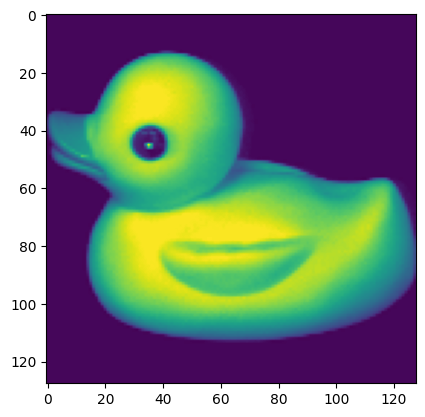

In [30]:
%matplotlib inline
# %matplotlib widget

import math
from matplotlib import pyplot as plt

X, l = RealWorldDatasets.COIL20.original_data

data = X[0]
data = data.reshape(int(math.sqrt(len(data))), -1)

plt.imshow(data)
plt.show()